In [4]:
# KMeans


In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('Cricket.csv',encoding='latin1')
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [7]:
df.shape

(79, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mat,79.0,245.075949,74.211716,128.00,188.000,232.00,281.500,463.00
Inns,79.0,230.544304,70.321022,127.00,177.000,217.00,261.500,452.00
NO,79.0,30.037975,14.421710,4.00,17.500,29.00,40.000,70.00
Runs,79.0,7618.139241,2551.873313,5080.00,5759.000,6798.00,8739.500,18426.00
Ave,79.0,38.523291,5.919093,23.57,34.600,37.87,41.845,53.94
BF,79.0,9684.455696,3193.835825,5504.00,7393.500,9134.00,10976.000,21367.00
SR,79.0,79.295316,9.925307,60.57,73.725,77.73,85.180,117.00
100,79.0,11.556962,8.092014,0.00,6.000,10.00,15.500,49.00
50,79.0,46.443038,16.351701,23.00,34.500,42.00,54.000,96.00
0,79.0,13.253165,5.925755,3.00,9.000,13.00,16.000,34.00


In [10]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [11]:
df[['Start','End']]=df.Span.str.split('-',expand=True)

In [12]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  Start   79 non-null     object 
 14  End     79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [14]:
df[['Start','End']]=df[['Start','End']].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  Start   79 non-null     int32  
 14  End     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8), object(3)
memory usage: 8.8+ KB


In [16]:
df['Exp']=df['End']-df['Start']
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [17]:
df=df.drop(['Span','Start','End'],axis=1)
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133*,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96*,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120*,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Exp     79 non-null     int32  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int32(1), int64(8), object(2)
memory usage: 7.8+ KB


In [18]:
x=df.pop('Exp')

In [19]:
df.insert(2,'Exp',x)

In [20]:
#ploting
df

,Player,Mat,Exp,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),463,23,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),404,15,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),375,17,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),445,22,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),448,17,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,16,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),162,13,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),197,10,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),198,11,161,33,5088,156,39.75,5504,92.44,6,30,15


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

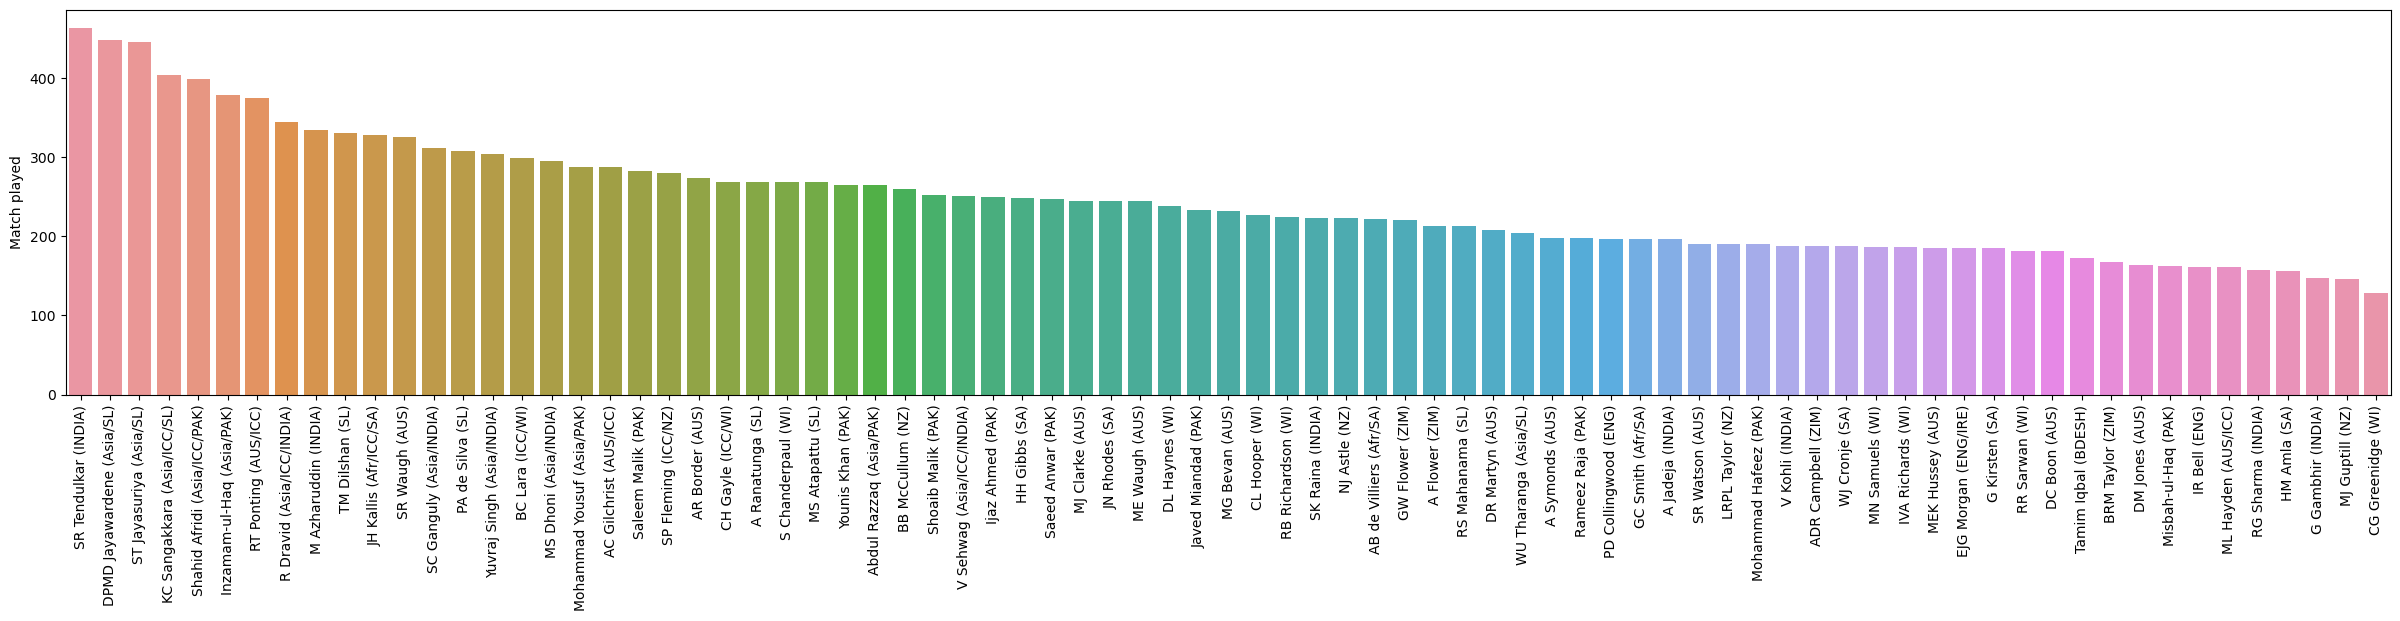

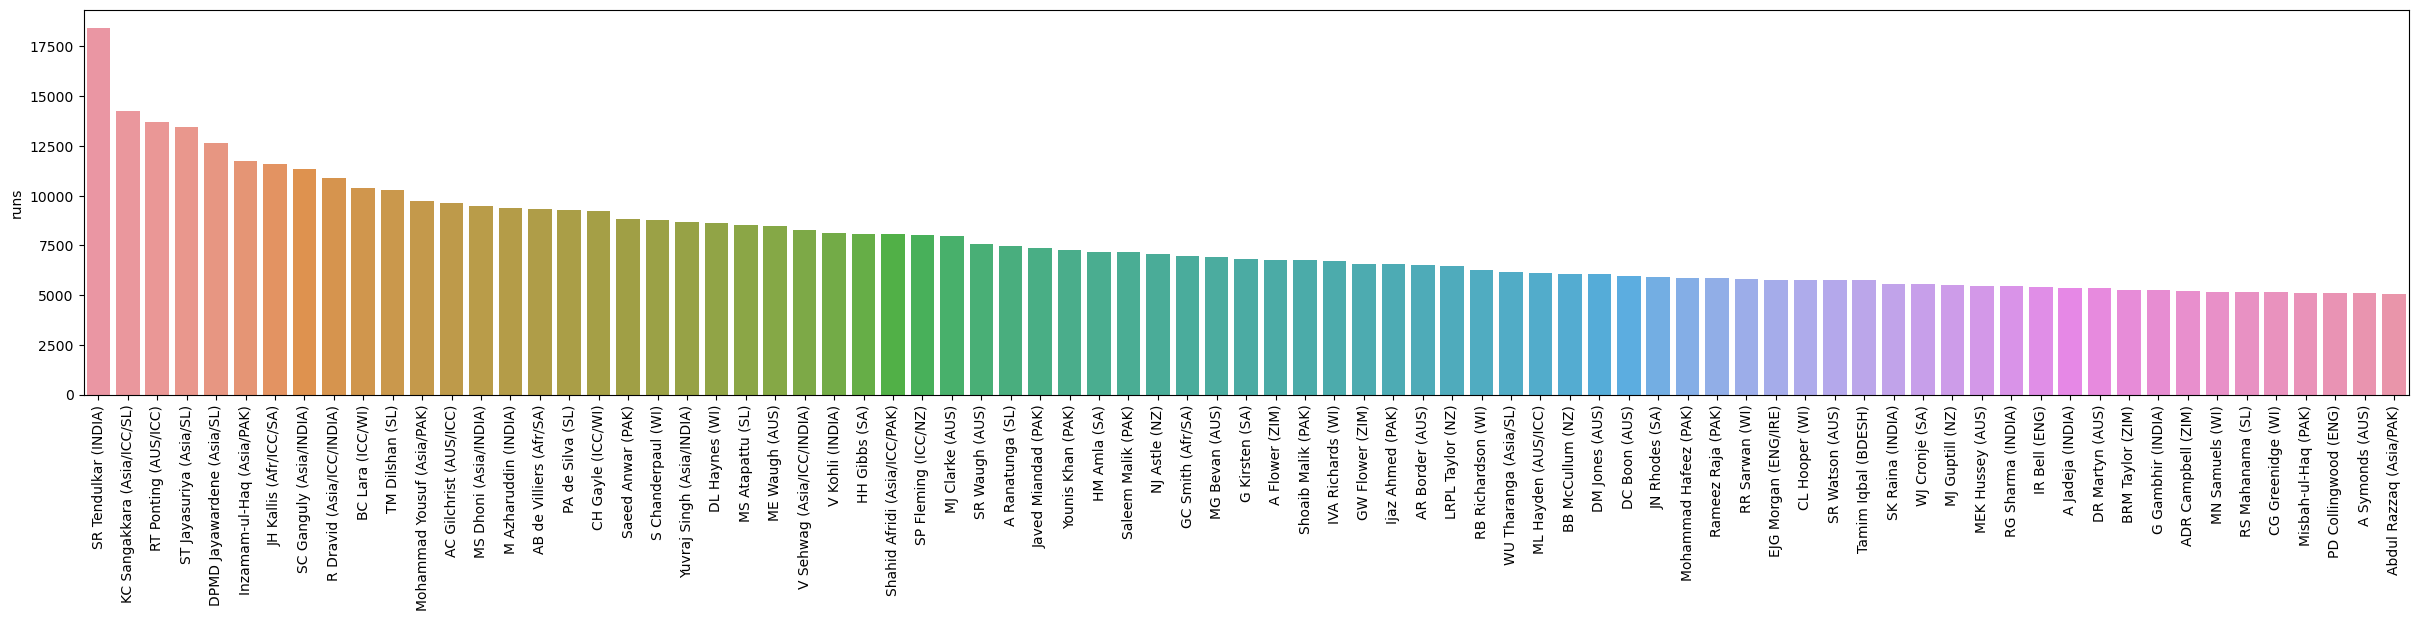

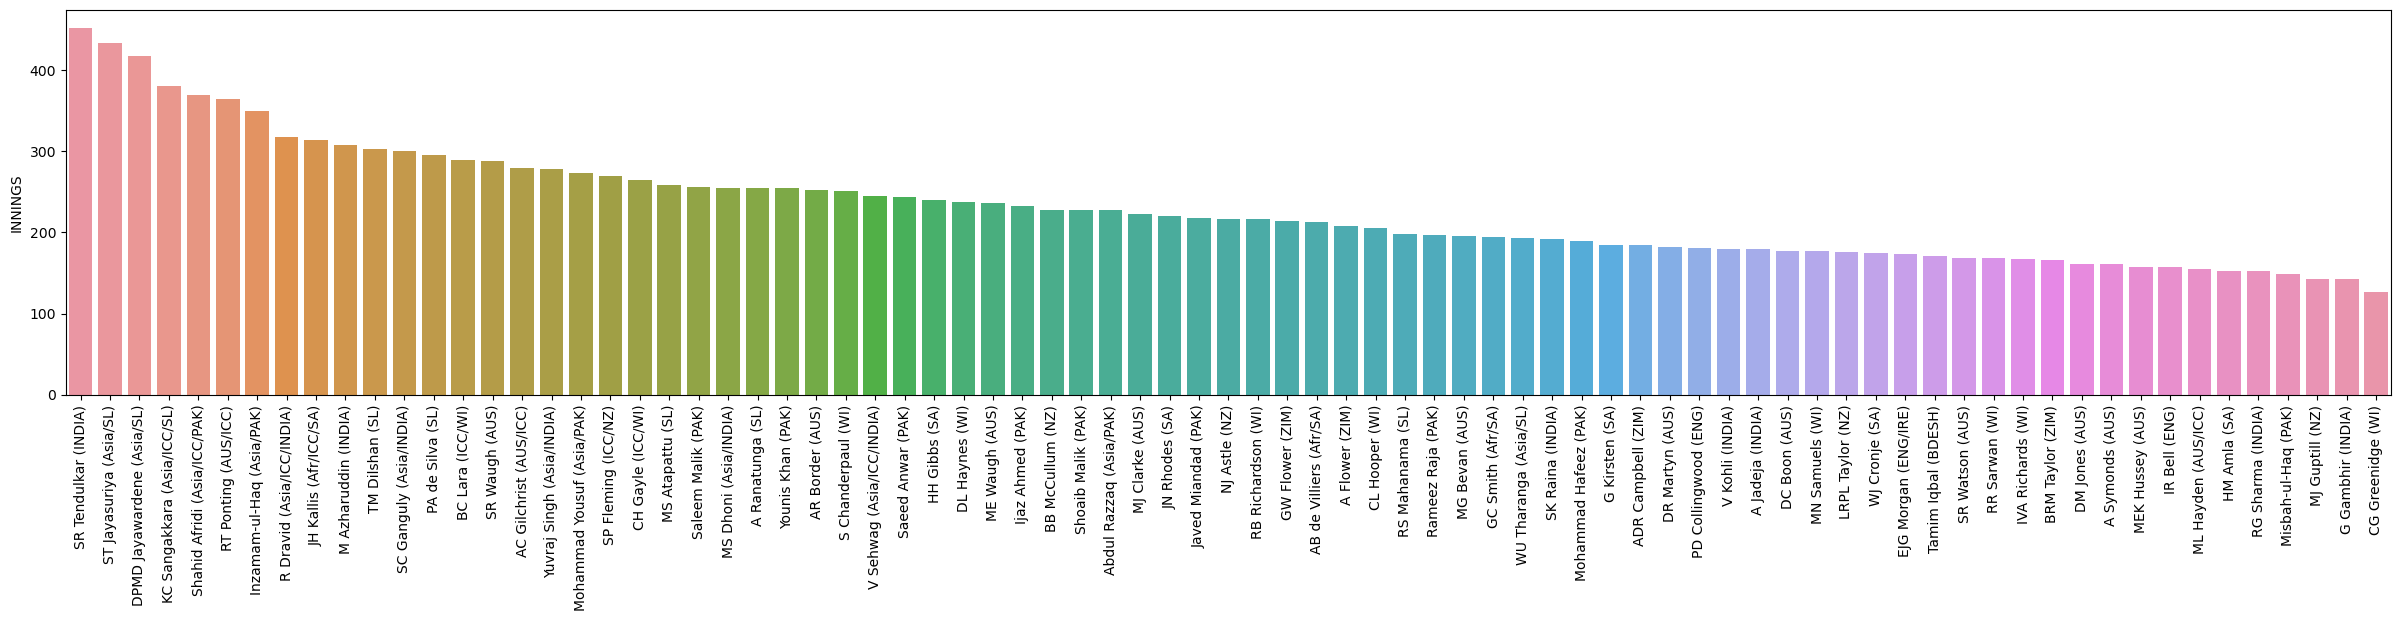

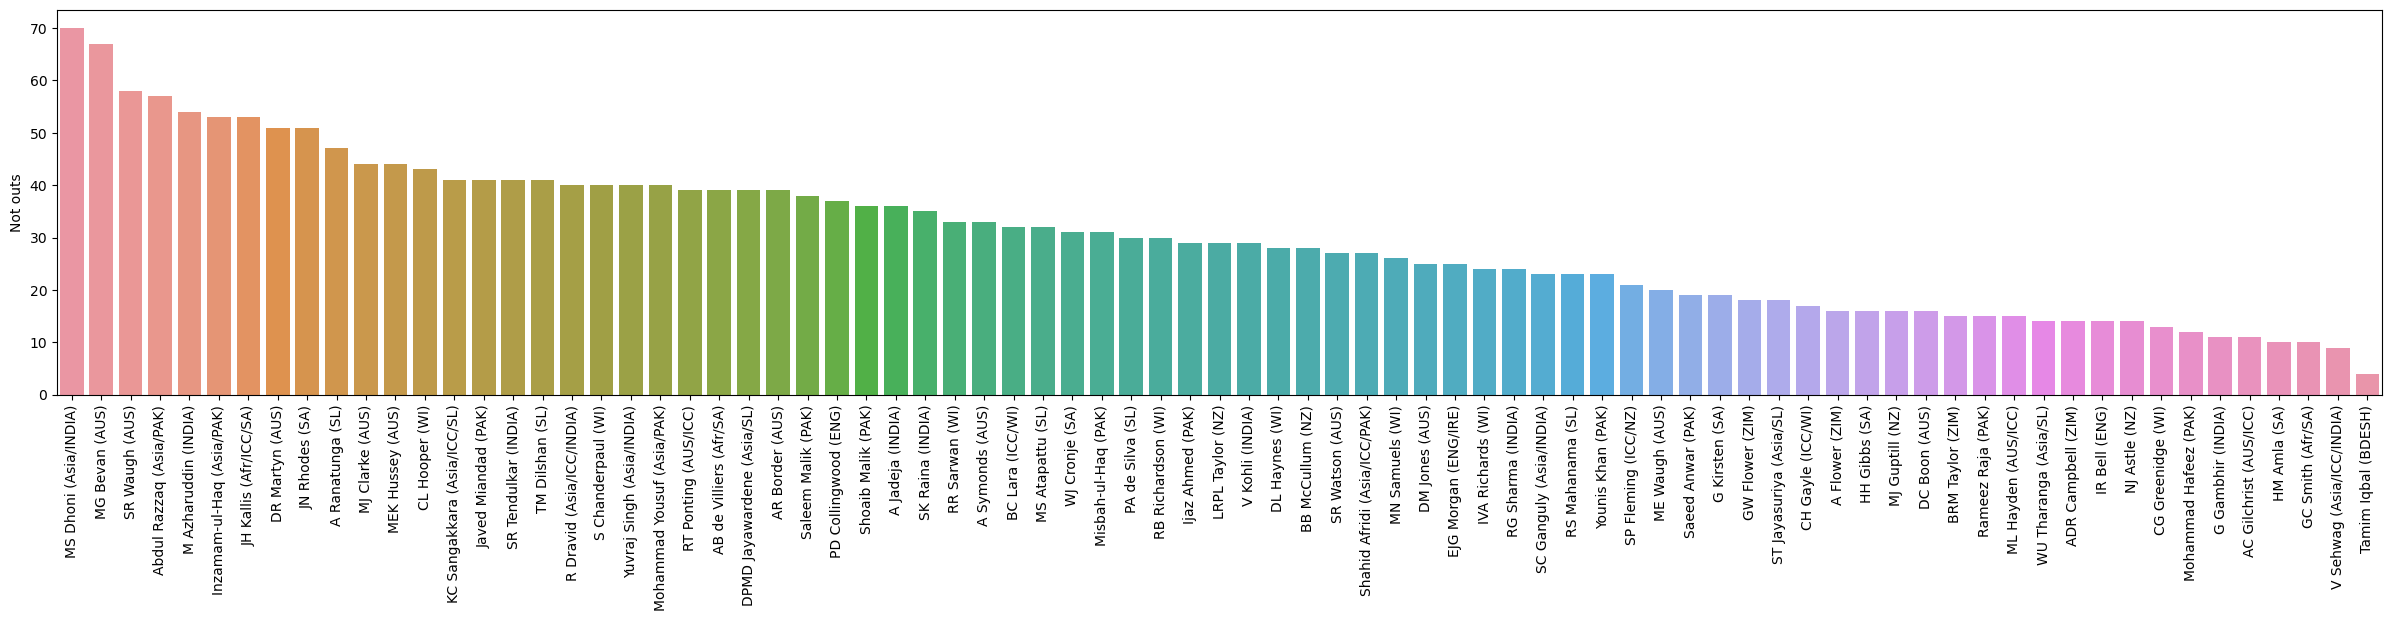

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 3000x500 with 0 Axes>

In [22]:
plt.figure(figsize=(30,5))
mat=df[['Player','Mat']].sort_values('Mat',ascending=False)
ax=sns.barplot(x='Player',y='Mat',data=mat)
ax.set(xlabel='',ylabel='Match played')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(30,5))
runs=df[['Player','Runs']].sort_values('Runs',ascending=False)
ax=sns.barplot(x='Player',y='Runs',data=runs)
ax.set(xlabel='',ylabel='runs')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(30,5))
inns=df[['Player','Inns']].sort_values('Inns',ascending=False)
ax=sns.barplot(x='Player',y='Inns',data=inns)
ax.set(xlabel='',ylabel='INNINGS')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(30,5))
no=df[['Player','NO']].sort_values('NO',ascending=False)
ax=sns.barplot(x='Player',y='NO',data=no)
ax.set(xlabel='',ylabel='Not outs')
plt.xticks(rotation=90)
plt.show()


#df.HS=df.HS.str.extract('(\d+)')
#df.HS=df.HS.astype(int)

plt.figure(figsize=(30,5))
HS=df[['Player','HS']].sort_values('HS',ascending=False)
ax=sns.barplot(x='Player',y='HS',data=HS)
ax.set(xlabel='',ylabel='HIgh score')
plt.xticks(rotation=90)
plt.show()
plt.savefig('output.png')

In [ ]:
df

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.show()

In [ ]:
#Eda
## '''data 
## 1-Check the data
## 2-data types of the data
## 3-Checking Null values
## 4-Handling Null values (Filling (with Mean, Median & Mode) and Removing)
## 5-Outliers (conditional)
## 6-Handling Outliers(if required)
## 7-Correlation


#supervised
## 8-Taking the independent variables
## 9-
## IV Method - if any object column is there
## 10-Changing object to Numeric (Using Label Encoder / One Hot Encoder)
## 11- vif
## 12-model
## 13-predict
## 14-performance


In [27]:
df_drop=df.copy()
player=df_drop.pop('Player')

In [ ]:
df_drop

In [ ]:
#Rescaling

In [24]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [28]:
df_scaled=scaler.fit_transform(df_drop)

ValueError: could not convert string to float: '200*'

In [ ]:
df_scaled

In [ ]:
df.columns

In [ ]:
df_df1=pd.DataFrame(df_scaled,columns=['Mat', 'Exp', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'])
df_df1.head()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#elbow 
clusters=list(range(2,8))
ssd=[]
for num_clusters in clusters:
    model_clus=KMeans(n_clusters=num_clusters,random_state=50,max_iter=150)
    model_clus.fit(df_df1)
    ssd.append(model_clus.inertia_)
plt.plot(clusters,ssd);

In [ ]:
cluster=KMeans(n_clusters=4,random_state=15)
cluster.fit(df_df1)

In [ ]:
#avg,sr,no

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 0)
    kmeans.fit(df_df1)
    
    cluster_labels = kmeans.labels_
    
    
    silhouette_avg = silhouette_score(df_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [ ]:
cluster_labels

In [ ]:
df['Cluster_Id']=cluster_labels
df

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.scatterplot(x='Ave',y='NO',hue='Cluster_Id',data=df,legend='full',palette='Set1')
plt.subplot(3,1,2)
sns.scatterplot(x='Ave',y='SR',hue='Cluster_Id',data=df,legend='full',palette='Set1')
plt.subplot(3,1,3)
sns.scatterplot(x='NO',y='SR',hue='Cluster_Id',data=df,legend='full',palette='Set1')
plt.show()

In [ ]:
df[df['Cluster_Id']==0].sort_values(by=['NO','Ave','SR'],ascending=[False,False,False]).head()

In [ ]:
df[df['Cluster_Id']==1].sort_values(by=['NO','Ave','SR'],ascending=[False,False,False]).head()

In [ ]:
df[df['Cluster_Id']==2].sort_values(by=['NO','Ave','SR'],ascending=[False,False,False]).head()

In [ ]:
df[df['Cluster_Id']==3].sort_values(by=['NO','Ave','SR'],ascending=[False,False,False]).head()

In [ ]:
df[df['Cluster_Id']==4].sort_values(by=['NO','Ave','SR'],ascending=[False,False,False]).head()

In [ ]:
df[df['Cluster_Id']==5].sort_values(by=['NO','Ave','SR'],ascending=[False,False,False]).head()

In [ ]:
df[df['Cluster_Id']==6].sort_values(by=['NO','Ave','SR'],ascending=[False,False,False]).head()

In [ ]:
df[df['Cluster_Id']==7].sort_values(by=['NO','Ave','SR'],ascending=[False,False,False]).head()